## Is Science Becoming Less Disruptive?

* This is a project created in the context of the course: "Applied Machine Learning". <br>
* In this assignment we will create a Machine Learning model that can predict, as accurately as possible, the CD5 of a published paper. <br>
* The analysis will be done on Google Colab
* This Jupyter in **continue**(**part b of assignemnt**) of Jupyter NonNeuralNetwork, it conatins an implemenation of Regression using Neural Network.

---
>Evangelia P. Panourgia, Data Scientist <br>
>Id : t8190130 <br>
>Department of Management Science and Technology <br>
>Athens University of Economics and Business <br>
>eva.panourgiaa@gmail.com <br>

## Neural Network Regression

* To start with, we will load teh needeed libraries.

In [31]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import random as rn
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

* We will read our data that we saved from our main jupyter.
* You can take the original analyzed data from the folder `copy` and take from it the csv named :: `this_is_the_final_csv_for_google_colab.csv` and put this csv in Google Colab and you will have exactly the same reproduction of MAE and loss plot.     

In [32]:
all = pd.read_csv('this_is_the_final_csv_for_google_colab.csv')

In [33]:
all.drop('Unnamed: 0',axis=1,inplace=True) # we will drom this useless column 

* Let's preview our dataframe.

In [34]:
all

,published_year,ratio,referencies,cdindex,refer,fields,authors,times,doi
0,1946,1.000000,0,1.000000,0.0,2,1,2,10.1017/s0003598x00019207
1,1947,1.000000,9,0.000000,0.0,5,4,5,10.4039/ent79161-9
2,1947,0.968254,11,-0.071429,0.0,2,2,2,10.1177/004051754701700802
3,1948,1.000000,0,1.000000,1.0,2,1,4,10.1017/s0373463300034494
4,1948,0.880000,4,1.000000,0.0,1,1,1,10.1090/qam/24251
...,...,...,...,...,...,...,...,...,...
40936,2017,0.940000,38,0.000000,0.0,1,11,60,10.1152/ajprenal.00486.2016
40937,2017,0.833333,44,-0.003106,0.0,2,8,218,10.1039/c6tc04529d
40938,2017,0.845238,43,0.002105,0.0,1,3,3,10.1108/ijchm-03-2015-0092
40939,2017,0.936000,21,-0.013514,0.0,3,8,331,10.1136/acupmed-2016-011139


* We will sellect features for creating **X** 
* We will define the y variable (target). 
* In addition, after many trials we conclused to remove **refer** variable because we have lower **MAE** (that is Mean Absolute Error).  

In [35]:
feature_data = all[['published_year','ratio','referencies',
                    'times','fields','authors']] # remove refer 
X = feature_data
y = all['cdindex']

* We will split our data to training and testing sets (**20%**). 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)

* We will use TensorFlow's `Normalization()` layer to normalize our data.

In [37]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
with np.printoptions(precision=2):
    print(normalizer.mean)
    print(normalizer.variance)
    print(normalizer.count)

tf.Tensor([[2.00e+03 9.17e-01 2.62e+01 1.21e+02 2.33e+00 4.05e+00]], shape=(1, 6), dtype=float32)
tf.Tensor([[1.45e+02 5.74e-03 1.08e+03 1.64e+04 1.78e+00 2.96e+02]], shape=(1, 6), dtype=float32)
<tf.Variable 'count:0' shape=() dtype=int64, numpy=32752>


* Bearing in mind the algorithms we will use are probabilistic, we will initialize the random number generators with specific values to ensure reproducibility.

In [38]:
np.random.seed(13)
tf.compat.v1.set_random_seed(13)
rn.seed(12345)

os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''

* Now with the `build_compile_model()` function we wiil create out neural network.

* The neural network will consist of:

    * An input layer.

    * One hidden layer, of size **80**, connected to the input layer.

    * One hidden layer, of size **50**, connected to the first hidden layer.

    * One output layer, of size one.

* Next, we will compile it using the **Adam** Optimizer.

In [39]:
## 2 
def build_compile_model():
    data_len = len(feature_data.columns)
    
    model = keras.Sequential([
        normalizer,
        layers.Dense(80, activation='relu'),         
        layers.Dense(50, activation='relu'),  
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

model = build_compile_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 80)                560       
                                                                 
 dense_13 (Dense)            (None, 50)                4050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 4,674
Trainable params: 4,661
Non-trainable params: 13
_________________________________________________________________


* Here we can observe that we have **4,674** parameters in total 
* In addition, the total rows of our dataframe are :: **40941**
* This is a good because we don't want to the number of our parameters to be close with the number of the total rows of our dataframe (as it may be an indicator of overiffiting) 
* In addition, we will use some **callbacks**.
    * For our train we will use the [ReduceLROnPlateau](https://www.bing.com/search?q=keras+ReduceLROnPlateau&cvid=88a5a61624544d59b98fd58b496d82cd&aqs=edge..69i57.1684j0j1&pglt=43&FORM=ANNTA1&PC=DCTS) callback, that reduces the learning rate of the model during the train when it is stack.
    * We will also use the [EarlyStopping](https://keras.io/api/callbacks/early_stopping/) callback that stops the train of the model when no improvement is noticed for many epochs.
* Having done that, we are ready to train, i.e., fit the model.
* Now, we are ready to train our regression Neural Network model (`fit`)

In [40]:
np.random.seed(13)
tf.compat.v1.set_random_seed(13)
rn.seed(123)

os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''

num_epochs = 300  

# callbacks 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, mode='min', patience=15, min_lr=0.00005)

history = model.fit(
    X_train, y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr], # pass callbacks 
    verbose=1)

Epoch 1/300
819/819 [==============================] - 4s 4ms/step - loss: 0.1108 - val_loss: 0.0657 - lr: 0.0010
Epoch 2/300
819/819 [==============================] - 2s 3ms/step - loss: 0.0589 - val_loss: 0.0654 - lr: 0.0010
Epoch 3/300
819/819 [==============================] - 2s 3ms/step - loss: 0.0513 - val_loss: 0.0545 - lr: 0.0010
Epoch 4/300
819/819 [==============================] - 2s 3ms/step - loss: 0.0478 - val_loss: 0.0535 - lr: 0.0010
Epoch 5/300
819/819 [==============================] - 2s 2ms/step - loss: 0.0466 - val_loss: 0.0481 - lr: 0.0010
Epoch 6/300
819/819 [==============================] - 2s 2ms/step - loss: 0.0441 - val_loss: 0.0447 - lr: 0.0010
Epoch 7/300
819/819 [==============================] - 3s 4ms/step - loss: 0.0437 - val_loss: 0.0464 - lr: 0.0010
Epoch 8/300
819/819 [==============================] - 2s 2ms/step - loss: 0.0428 - val_loss: 0.0431 - lr: 0.0010
Epoch 9/300
819/819 [==============================] - 2s 2ms/step - loss: 0.0421 - val_

* Reading the summary we can observe the following ones: 
    * Both Loss an d Val Loss seems to decreases.
    * The model stopped in **209** epochs thank to **Early Stopping** (it is a technique to avoid overfitting).
    * In addition, was useful ReduceLROnPlateau callback since we can observe that it changes sometimes during the training process.   

In [41]:
model.evaluate(X_test, y_test, verbose=0)

0.03307007625699043


* We can observe that **MAE** is equal to **0.03307007625699043**. 
* Ouaou !! This is the **BEST** values of MAE that we managed bearing in mind the other models (Decision Tree Regressor, Random Forest, XBoost, LightGBM) that we trained in the main jupyter 

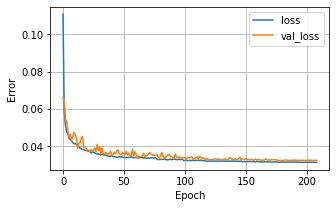

In [42]:
def plot_loss(history):
    plt.figure(figsize=(5, 3))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
plot_loss(history)

* From the above plot we can observe the following ones: 
    * The flow of lines for both loss, val loss decreases during the epochs. 
    * The val_loss is quite close to loss line.
* So, we can concluse that our model is **not** Overfitted (it may helps early stopping, too). 

## Conclusion
* From the whole analysis our best model is the Neural Network Regressor with Mean Absolute Error equal to **0.03307007625699043**
    * Then **Random Forest** is better with about MAE **~0.39**
    * Then **Decision Tree** is the third betetr about MAE **~0.40**
    * For both Random Forests and Decision Tree dominant important feature with big diffrence is the feature **refrencies**, whereas is **LightGBM** times, refrensies and published year are dominant but without big diffrence.
    * Fianlly, **XBoost** has the lower MAE in comparison with other regressor models that we trained. 
* In addition, our **Decision Tree Classifier** plays supportive role for debugginh and having a general idea if cdindex will be high or medium, for low cdindexx the model is not predict well. 
* Furthermore, the idea fro removing the feature **refer** stemming from the fact than in trees **feature importances** we observed that **refer** has **low** values. 
* Finally, I would like to thank Professor **Panos Louridas** for the knowledge that offer to my colleague and me during the course **Applied Machine Learning**. 
